### Codio Activity 15.3: Gradient Descent and Linear Regression

In this activity you will use gradient descent to identify the parameter $\theta_0$ that minimizes the Mean Squared Error of predictions using the model $y = \theta_0  x$.  In this example, you will use a dataset containing information from a credit card company on customers.  Your goal will be to build a linear model to predict the balance using the credit rating. 

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
credit = pd.read_csv('codio_15_3_solution/data/Credit.csv', index_col=0)

In [4]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


<Axes: >

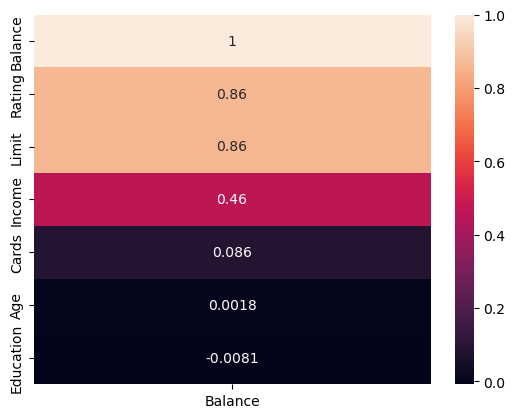

In [11]:
sns.heatmap(credit.select_dtypes(include = 'number').corr()[['Balance']].sort_values(by = 'Balance', ascending = False), annot = True)

In [13]:
X = credit[['Rating']]
y = credit['Balance']

<Axes: xlabel='Rating', ylabel='Balance'>

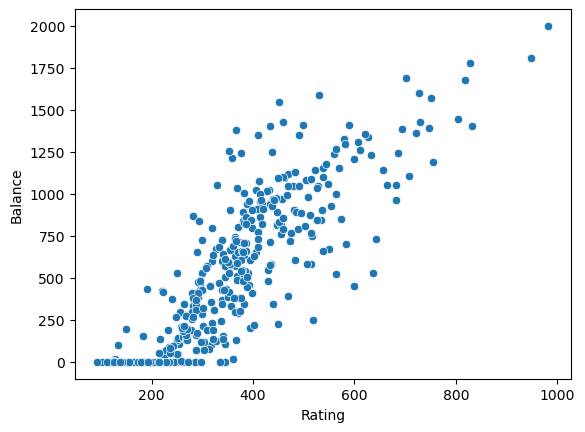

In [14]:
sns.scatterplot(data = credit, x = 'Rating', y = 'Balance')

### Problem 1

#### A Basic Model

To begin, complete the function `mse` below that takes in a value for $\theta$ and returns the mean squared error based on the model 

$$\text{Balance} = \theta \times \text{Rating}$$

In [15]:
def mse(theta):
    '''
    This function takes in a float for theta and 
    returns the mean squared error according to the
    mean of the formula (y - theta*credit['Rating'])**2.
    
    Arguments
    ---------
    theta: float
          coefficient of linear model
          
    Returns
    -------
    mse: float
         Mean Squared Error of Linear model against y
    '''
    pass

In [16]:
def mse(theta): 
    return np.mean((y-theta*credit['Rating'])**2)

In [17]:
mse(10)

np.float64(10550372.83)

### Problem 2

#### Considering Many $\theta$'s

Now, consider the array of thetas given below as `thetas`.  Iterate over the array of thetas and compute the **Mean Squared Error** for the given $\theta$.  Keep track of these in the list `mses` below.  Uncomment to plot to view the results.

In [18]:
thetas = np.linspace(-10, 13, 50)

In [20]:
mses = []
for i in thetas:
    mses.append(mse(i))
mses[-5:]

[np.float64(13551514.585476885),
 np.float64(14918512.776001668),
 np.float64(16351547.666930446),
 np.float64(17850619.258263227),
 np.float64(19415727.55)]

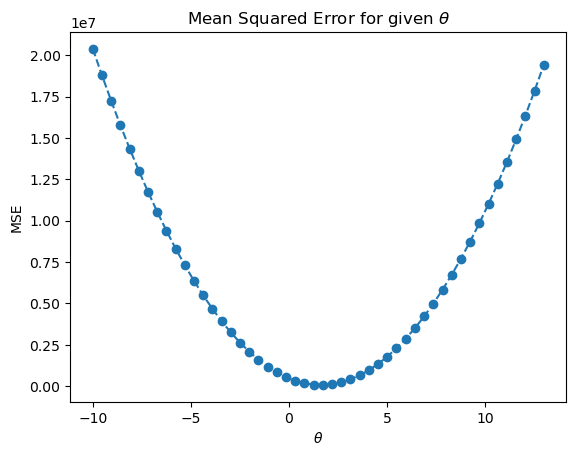

In [21]:
plt.plot(thetas, mses, '--o')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE');
plt.title(r'Mean Squared Error for given $\theta$');

### Problem 3

#### Finding the $\theta$ that minimizes MSE

Now, you are to use gradient descent with the following parameters to identify the $\theta$ that minimizes the `mse` function.  Again, you are given a function `df` to approximate the derivative of the `mse` function.

```
- x0 = 10
- step_size = 0.1
```

Use 200 iterations of the gradient descent algorithm.  Did the algorithm converge to a reasonable value?  Assign the value of theta to `theta_big_step` as a float below.

In [32]:
def df_mse(x):
    return (mse(x+0.001) - mse(x))/0.001

In [34]:
xs = [10]
for i in range(200):
    x_next = xs[-1] - 0.1* df_mse(xs[-1])
    xs.append(x_next)
theta_big_step = xs[-1]

In [35]:
xs[-5:]

[np.float64(-225156150858558.2),
 np.float64(-225156150858558.2),
 np.float64(-225156150858558.2),
 np.float64(-225156150858558.2),
 np.float64(-225156150858558.2)]

In [36]:
theta_big_step

np.float64(-225156150858558.2)

### Problem 4

#### A smaller step size

Now, try using 1000 iterations of the gradient descent algorithm with:

```
x0 = 10
step_size = 0.000001
```

Did the algorithm converge?  What is the optimal $\theta$?  Assign as a float to `theta_small_step` below.

In [41]:
x0 = 10
step_size = 0.000001
xs = [10]

In [42]:
for i in range(1000):
    x_next = xs[-1] - 0.000001 * df_mse(xs[-1])
    xs.append(x_next)
xs[-5:]

[np.float64(1.6400427248908689),
 np.float64(1.6400427248908689),
 np.float64(1.6400427248908689),
 np.float64(1.6400427248908689),
 np.float64(1.6400427248908689)]

In [43]:
theta_small_step = xs[-1]
theta_small_step

np.float64(1.6400427248908689)

### Problem 5

#### Checking against `sklearn`

Finally, you are to compare your solution using the small step size to that obtained from scikitlearn's `LinearRegression` estimator.  Be sure to set `fit_intercept = False`.  After fitting the estimator, determine the absolute difference between your solution for $\theta$ from [Problem 4](#-Problem-4) and the `.coef_` attribute of the fit sklearn model.  Assign as a float to `error`. Were you able to get a similar answer using gradient descent?

In [44]:
lr = LinearRegression(fit_intercept=False).fit(X, y)
error = float(abs(lr.coef_ - xs[-1]))

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1667/2769576925.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error = float(abs(lr.coef_ - xs[-1]))


In [45]:
print(error)

0.0004999999999435456


### Codio Activity 15.4: Convexity

This activity focuses on determining the convexity of a given function.  Your goal is to identify whether or not a function has the appropriate convexity for finding a maximum or a minimum value.  In addition to the approach introduced in the lectures, you will also explore how the second derivative can be used to explore convexity.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Jensen's Inequality

Recall from the lecture the inequality:

$$tf(x_0) + (1 - t)f(x_1) \geq f(tx_0 + (1 - t)x_1)$$

In what follows your goal is to build intuition behind what this inequality says about a functions convexity by comparing the results of the inequality applied to two basic quadratic functions -- $f(x) = x^2$ and $g(x) = -x^2$.  You will select sample points $x_0 = a$ and $x_1 = b$ and explore the secant lines relationship to points in between $x_0$ and $x_1$.

### Problem 1

#### Defining the Functions

To begin, define functions $f$ and $g$ as defined below.  Also, using `np.linspace` to define a domain `x` from $x = [-2, 2]$ with 100 equally spaced points.  Uncomment the code to visualize your solutions.

In [2]:
def f(x): return x**2

In [3]:
def g(x): return -x**2

In [13]:
x = np.linspace(-2,2,100)
x[-5:]

array([1.83838384, 1.87878788, 1.91919192, 1.95959596, 2.        ])

Text(0.5, 1.0, '$g(x) = -x^2$')

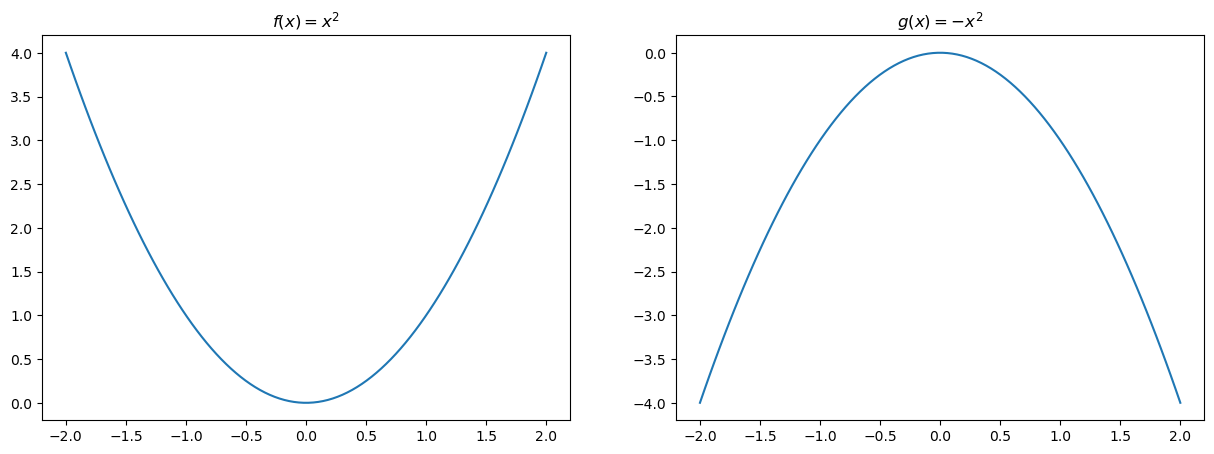

In [20]:
fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(x,f(x), label = 'f')
ax[0].set_title(r'$f(x) = x^2$')
ax[1].plot(x,g(x), label = 'g')
ax[1].set_title(r'$g(x) = -x^2$')

### Problem 2

#### A Secant Line

To begin, complete the function `secant_f` that takes in two `x` values and returns a linear equation between the points $(x_0, f(x_0))$ and $(x_1, f(x_1))$.  Test your function by plotting the results of $x_0 = -.5$ and $x_1 = 1$.

In [21]:
def secant_f(x, x0, x1):
    '''
    This function returns the linear equation between
    the points (x0, f(x0)) and (x1, f(x1)).
    
    Arguments
    ---------
    x: np.array
      domain of x to evaluate function on
    x0: float
      first x-coordinate of secant line
    x1: float
      second x-coordinate of secant line
      
    Returns
    -------
    array of values where linear function
    is evaluated over domain x.
    '''
    pass

In [22]:
def secant_f(x, x0, x1):
    return (f(x0)-f(x1))/(x0 - x1) * (x - x0) + f(x0)
    

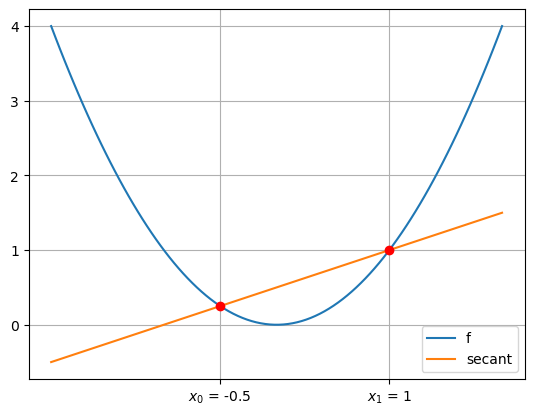

In [29]:
plt.plot(x, f(x), label = 'f')
plt.plot(x, secant_f(x,-0.5,1), label = 'secant')
plt.plot(-0.5,f(-0.5), 'ro')
plt.plot(1, f(1), 'ro')
plt.xticks([-0.5,1],[r'$x_0$ = -0.5', r'$x_1$ = 1'])
plt.legend()
plt.grid();

### Problem 3

#### Consider a value between $x_0$ and $x_1$

Note the term $tx_0 + (1 - t)x_1$ in the inequality.  This is considered for all $t \in [0, 1]$.  Effectively, this considers all points between $x_0$ and $x_1$.  You will only consider the point where $t = 0.5$.  Determine this value as $x_t$ and its corresponding values `secant(x_t)` and `f(x_t)` as `s_x_t` and `f_x_t` respectively below.  Plot the results.

In [30]:
x0 = -0.5
x1 = 1
t = 0.5


In [31]:
x_t = t*x0 +(1-t)*x1
x_t

0.25

In [34]:
s_x_t = secant_f(x_t,x0,x1)
s_x_t

0.625

In [35]:
f_x_t = f(x_t)
f_x_t

0.0625

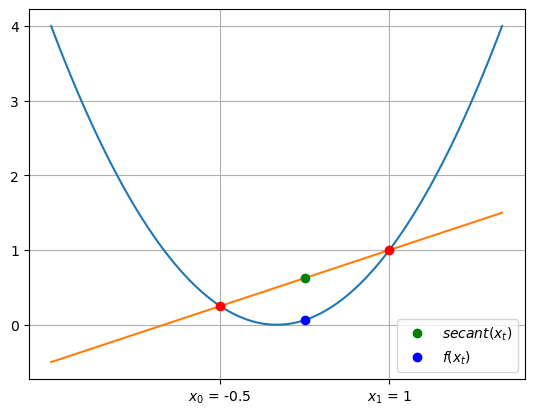

In [36]:
plt.plot(x, f(x))
plt.plot(x, secant_f(x, -0.5, 1))
plt.plot(-0.5, f(-0.5), 'ro')
plt.plot(1, f(1), 'ro')
plt.plot(x_t, s_x_t, 'go', label = r'$secant(x_t)$')
plt.plot(x_t, f_x_t, 'bo', label = r'$f(x_t)$')
plt.xticks([-0.5, 1], [r'$x_0$ = -0.5', r'$x_1$ = 1'])
plt.legend()
plt.grid();

### Problem 4

#### The Important Comparison

Note that Jensen's inequality essentially says that if this is true for every point between $x_0$ and $x_1$ and all values $t \in [0, 1]$ then the function is convex.  Repeat the above process for the function $g(x)$ by first defining a function `secant_g`.  How much greater is `g(0.5x_0 + 0.5x_1)` than `secant_g(x, x_0, x_1)` where `x_0 = -0.5` and `x_1 = 1`?  Assign your values to `g_x_t` and `secant_g_x_t` respectively.

In [37]:
def secant_g(x, x0, x1):
    return (g(x0) - g(x1))/(x0 - x1)*(x - x0) + g(x0) 
g_x_t = g(x_t)
secant_g_x_t = secant_g(x_t, -0.5, 1.0)

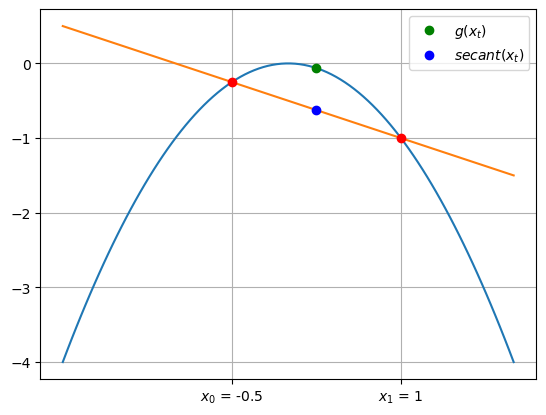

In [38]:
plt.plot(x, g(x))
plt.plot(x, secant_g(x, -0.5, 1))
plt.plot(-0.5, g(-0.5), 'ro')
plt.plot(1, g(1), 'ro')
plt.plot(x_t, g_x_t, 'go', label = r'$g(x_t)$')
plt.plot(x_t, secant_g_x_t, 'bo', label = r'$secant(x_t)$')
plt.xticks([-0.5, 1], [r'$x_0$ = -0.5', r'$x_1$ = 1'])
plt.legend()
plt.grid();

### Problem 5

#### A Different Loss Function

Instead of the squared loss function, consider an absolute value function given below. Note this mimics the **Mean Absolute Error** function.  

Is this function convex or not?  Consider a secant line that includes $x_0 = 0$ and assign your answer as a boolean to `is_convex`.

In [39]:
def mae(x):
    return abs(x)

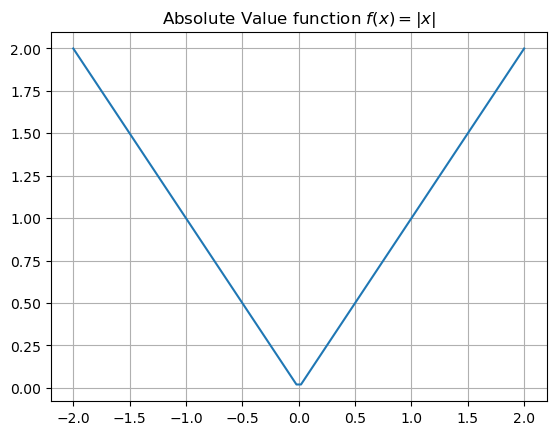

In [40]:
plt.plot(x, mae(x))
plt.title(r'Absolute Value function $f(x) = |x|$')
plt.grid();

In [41]:
is_convex = True

In [42]:
print(f'The function is convex: {is_convex}')

The function is convex: True
